In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.applications.vgg16 import preprocess_input as pi
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
# !pip install git+https://github.com/tensorflow/examples.git
# !pip install segmentation_models



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


FUNCTION FOR DATA AUGMENTATION

In [2]:
#### FUNCTION TO AUGMENT IMAGE DATA
from keras.preprocessing.image import ImageDataGenerator
def augment(image_data,label_data,limit):
    
#     X_train = image_data
#     Y_train = label_data
    shift = 0.2
    # datagen---augmenter
    datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=360,
        width_shift_range=shift,
        height_shift_range=shift, shear_range=0.2,
        zoom_range=0.2, channel_shift_range=4.,
        horizontal_flip=True, vertical_flip=True,
#         rescale=1. /255,
        fill_mode='nearest')
    
    ####  1
    augmented_data1=np.zeros((900-limit[1],256,256,3))
    augmented_label1=np.full((900-limit[1]),1)
    
    datagen.fit(image_data[np.where(label_data==1)[0]])
    # datagen iterator
    aug_iter=datagen.flow(image_data[np.where(label_data==1)[0]],batch_size=1)
    for c in tqdm(range(900-limit[1])):
        image = next(aug_iter)[0]
        augmented_data1[c]=image
#     image_data  = np.concatenate((image_data, augmented_data), axis=0)
#     label_data  = np.concatenate((label_data, augmented_label), axis=0)
    
    ####  2
#     augmented_data=np.zeros((900-limit[2],256,256,3))
#     augmented_label=np.full((900-limit[2]),2)
    
#     datagen.fit(image_data[np.where(label_data==2)[0]])
#     # datagen iterator
#     aug_iter=datagen.flow(image_data[np.where(label_data==2)[0]],batch_size=1)
#     for c in tqdm(range(1500-limit[2])):
#         image = next(aug_iter)[0]
#         augmented_data[c]=image
#     image_data  = np.concatenate((image_data, augmented_data), axis=0)
#     label_data  = np.concatenate((label_data, augmented_label), axis=0)
    
    ####  3
    augmented_data2=np.zeros((442-limit[3],256,256,3))
    augmented_label2=np.full((442-limit[3]),3)
    
    datagen.fit(image_data[np.where(label_data==3)[0]])
    # datagen iterator
    aug_iter=datagen.flow(image_data[np.where(label_data==3)[0]],batch_size=1)
    for c in tqdm(range(442-limit[3])):
        image = next(aug_iter)[0]
        augmented_data2[c]=image
#     image_data  = np.concatenate((image_data, augmented_data), axis=0)
#     label_data  = np.concatenate((label_data, augmented_label), axis=0)
    
    ####  4
    augmented_data3=np.zeros((332-limit[4],256,256,3))
    augmented_label3=np.full((332-limit[4]),4)
    
    datagen.fit(image_data[np.where(label_data==4)[0]])
    # datagen iterator
    aug_iter=datagen.flow(image_data[np.where(label_data==4)[0]],batch_size=1)
    for c in tqdm(range(332-limit[4])):
        image = next(aug_iter)[0]
        augmented_data3[c]=image
    image_data  = np.concatenate((image_data, augmented_data1,augmented_data2,augmented_data3), axis=0)
    label_data  = np.concatenate((label_data, augmented_label1,augmented_label2,augmented_label3), axis=0)
    # Concatenating the old data with the augmented data
    
    print(image_data.shape)
    print(label_data.shape)
    return image_data,label_data

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
import glob
import cv2
import os
images_t = glob.glob("/kaggle/input/eye-data/train/*.jpeg")
labels_t=pd.read_csv('/kaggle/input/trainlabelcsv/trainLabels.csv')

NP ARRAY TO STORE IMAGES

In [5]:
img_h=256
img_w=256

# train_img=np.zeros((len(images_t),img_h,img_w,3),dtype=np.uint8)
# # train_label=np.zeros((len(images_t),5),dtype=np.uint8)
# train_label=np.zeros((len(images_t)))

LIMIT TO KEEP TRACK OF NUMBER OF IMAGES IN EACH CLASS

In [6]:
limit={
    0:0,
    1:0,
    2:0,
    3:0,
    4:0
}
 

IMAGE COLLECTOR

In [7]:
# n=0
# for i,id in tqdm(enumerate(images_t),total=len(images_t)):
#   name=((id.split('/'))[-1])[:-5]
# #   if limit[(labels_t[(labels_t.image==name)])['level'].values[0]]>=220:
# #     continue
#   limit[(labels_t[(labels_t.image==name)])['level'].values[0]]+=1
#   img=load_img(id,target_size=(img_h,img_w))
#   img=img_to_array(img)
#   train_img[n]=img
#   train_label[n]=(labels_t[(labels_t.image==name)])['level'].values[0]
#   n+=1
#   # train_label[i][(labels_t[(labels_t.image==name)])['level'].values[0]]=(labels_t[(labels_t.image==name)])['level'].values[0]

SAVING THE IMAGE NUMPY DATA FOR FUTURE USE SO THAT NO FURTHER TIME WASTED ON READING IMAGES

In [8]:
# np.save('eye_data',train_img)
# np.save('eye_label',train_label)

In [9]:
train_img=np.load('/kaggle/input/eye-np-data/eye_np_data/train1_256.npy')
train_label=np.load('/kaggle/input/eye-np-data/eye_np_data/train1_label.npy')

In [10]:
limit[0]=len(np.where(train_label==0)[0])
limit[1]=len(np.where(train_label==1)[0])
limit[2]=len(np.where(train_label==2)[0])
limit[3]=len(np.where(train_label==3)[0])
limit[4]=len(np.where(train_label==4)[0])
limit

{0: 6150, 1: 588, 2: 1283, 3: 221, 4: 166}

In [11]:
idx=np.where(train_label==0)[0]
idx=np.array(idx)
idx_ = np.arange(limit[0]-1000)
np.random.shuffle(idx_)
idx=idx[idx_]
train_img=np.delete(train_img,idx,axis=0)
train_label=np.delete(train_label,idx,axis=0)


idx=np.where(train_label==2)[0]
idx=np.array(idx)
idx_ = np.arange(limit[2]-1000)
np.random.shuffle(idx_)
idx=idx[idx_]
train_img=np.delete(train_img,idx,axis=0)
train_label=np.delete(train_label,idx,axis=0)

In [12]:
train_img.shape

(2975, 256, 256, 3)

JUST A BACKUP FOR IMAGE COLLECTION IF 'n' max IS SPECIFIED

In [13]:
# train_img=train_img[:n]
# train_label=train_label[:n]

(array([1000.,    0.,  588.,    0.,    0., 1000.,    0.,  221.,    0.,
         166.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

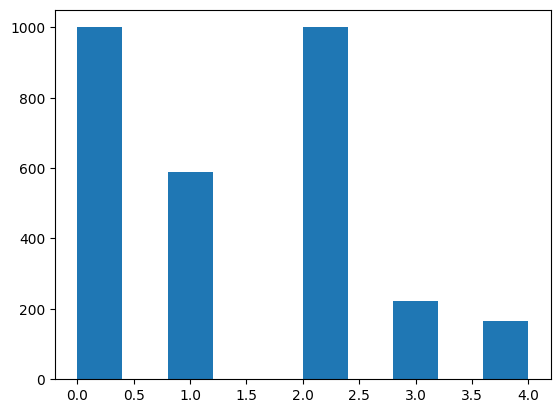

In [14]:
plt.hist(train_label)

In [15]:
# SPLITTING DATA BEFORE AUGMENTATION
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_img, train_label, test_size = 0.1, random_state = 42)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
limit[0]=len(np.where(y_train==0)[0])
limit[1]=len(np.where(y_train==1)[0])
limit[2]=len(np.where(y_train==2)[0])
limit[3]=len(np.where(y_train==3)[0])
limit[4]=len(np.where(y_train==4)[0])
print(limit)

(2677, 256, 256, 3)
(2677,)
(298, 256, 256, 3)
(298,)
{0: 905, 1: 514, 2: 911, 3: 195, 4: 152}


In [16]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
# for i in range(2):

#     # convert to unsigned integers
#     image = train_x[i]
 
#     # plot image
#     ax[i].imshow(image)
#     ax[i].axis('off')

In [17]:
# DATA AUGMENTATION

x_train,y_train=augment(x_train,y_train,limit)

100%|██████████| 180/180 [00:04<00:00, 43.57it/s]


(3490, 256, 256, 3)
(3490,)


In [18]:
#NORMALIZATION

from keras.utils import to_categorical
y_train=to_categorical(y_train, 5)
y_test=to_categorical(y_test, 5)
x_train = x_train.astype("float32")/255.
x_test=x_test.astype("float32")/255.

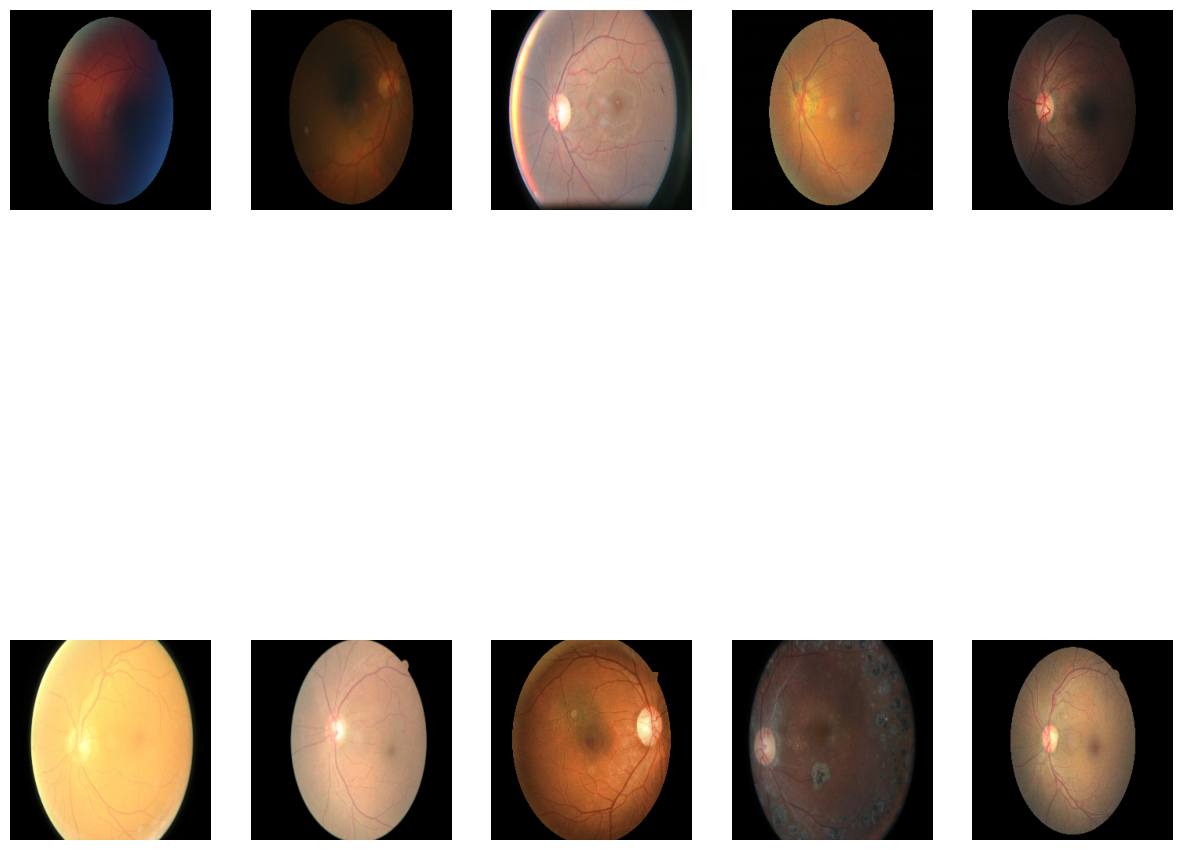

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,15))
k=0
for i in range(2):
    for j in range(5):

        # convert to unsigned integers
        image = x_train[k]
        k+=1

        # plot image
        ax[i][j].imshow(image)
        ax[i][j].axis('off')

In [20]:
N=x_train.shape[0]
BATCH_SIZE=32
idx = np.arange(N)
np.random.shuffle(idx)
data_train = (tf.data.Dataset.from_tensor_slices((x_train[idx],y_train[idx])).batch(BATCH_SIZE,drop_remainder=True))
data_test=(tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(BATCH_SIZE,drop_remainder=True))


In [21]:
from keras import backend as K
def f1(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [22]:
from keras.applications import InceptionResNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input
from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications import MobileNet
from keras.applications import InceptionResNetV2

def create_model(input_shape, n_out):
    pretrain_model = PTModel(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape)
    input_tensor = Input(input_shape)
    c0 = BatchNormalization()(input_tensor)
    c1= pretrain_model(c0)
    # c1=GlobalAveragePooling2D()(c1)

    c1 = Conv2D(128,3, activation='relu')(c1)
    c1 = Flatten()(c1)
    c1 = Dropout(0.4)(c1)
    c1 = Dense(256, activation='relu')(c1)
    c1 = Dropout(0.4)(c1)
    output = Dense(n_out, activation='softmax')(c1)
    model = Model(input_tensor, output)

    return model

In [ ]:
from keras.applications.xception import Xception as PTModel

xception_model=create_model((img_h,img_w,3),5)
xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),loss='categorical_crossentropy',metrics=['accuracy',f1])
xception_model.summary()
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
es = EarlyStopping( monitor = 'accuracy', mode = 'max', min_delta = 1,patience = 20,restore_best_weights = True,verbose = 2)  #'''min_delta = 1,patience = 20,'''
checkpoint_path = "xception/cp.ckpt"

mp=ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,monitor='val_accuracy',verbose=1)
call=[mp,es]

# xception_model.load_weights(checkpoint_path)

history=xception_model.fit(
    data_train,
    validation_data=data_test,
#     validation_split=0.1,
#     batch_size=1,
    # steps_per_epoch=100,
    epochs=14,
    callbacks=call)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization_9 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 6, 128)         2359424   
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4608)              0         
                                                           

In [23]:
from keras.applications.xception import Xception as PTModel

xception_model=create_model((img_h,img_w,3),5)
xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),loss='categorical_crossentropy',metrics=['accuracy',f1])
xception_model.summary()
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
es = EarlyStopping( monitor = 'accuracy', mode = 'max', min_delta = 1,patience = 20,restore_best_weights = True,verbose = 2)  #'''min_delta = 1,patience = 20,'''
checkpoint_path = "xception/cp.ckpt"

mp=ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,monitor='val_accuracy',verbose=1)
call=[mp,es]

# xception_model.load_weights(checkpoint_path)

history=xception_model.fit(
    data_train,
    validation_data=data_test,
#     validation_split=0.1,
#     batch_size=1,
    # steps_per_epoch=100,
    epochs=14,
    callbacks=call)

83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 128)         2359424   
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dropout (Dropout)           (None, 4608)              0      

## 